In [1]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading in data, input your own file directory

year_chosen = 2022

#### Path parameter for user flexibility ####
# path_header = "/Users/mervekeskin/Desktop/Erdos_DataCamp/2023_Erdos_Institute_Bootcamp_Education/" # Merve's Path
path_header = "../" #local path

#original data 
df_epp = pd.read_excel(f"{path_header}Data/SRC2022/Expenditures Per Pupil.xlsx")
df_nxp = pd.read_excel(f"{path_header}Data/SRC2022/Inexperienced Teachers and Principals.xlsx")
df_ocert = pd.read_excel(f"{path_header}Data/SRC2022/Teachers Teaching Out of Certification.xlsx")

#High School Data
#Absenteeism Rates, High School
dfab_HS = pd.read_excel(f"{path_header}Data/SRC2022/ACC HS Chronic Absenteeism.xlsx")

#Graduation Rate, High School 
# dfgradr_HS = pd.read_excel(f"{path_header}Data/SRC2022/ACC HS Graduation Rate.xlsx")
#Core Subject Performance Rates, High School 
dfCSPR_HS = pd.read_excel(f"{path_header}Data/SRC2022/ACC HS Core and Weighted Performance.xlsx")
#participation Rate
    #dfPR_HS = pd.read_excel(f"{path_header}/Data/SRC2022/ACC HS Participation Rate.xlsx")

In [3]:
#Elementary and Middle School Data 
#Participation Rates, Elementary and Middle
            #dfPR_EM = pd.read_excel("../Data/SRC2022/ACC EM Participation Rate.xlsx")
#Core Subject Performance Rates, Elementary and Middle 
dfCSPR_EM = pd.read_excel(f"{path_header}Data/SRC2022/ACC EM Core and Weighted Performance.xlsx")
#Absenteeism Rates, Elementary School
dfab_EM = pd.read_excel("../Data/SRC2022/ACC EM Chronic Absenteeism.xlsx")

#Staff Data
#post secondary enrollment, high school
    #dfPSE_HS = pd.read_excel("../Data/SRC2022/Postsecondary Enrollment.xlsx")

In [4]:
dfab_HS.drop(columns=["SUBJECT"], inplace=True)
dfab_EM.drop(columns=["SUBJECT"], inplace=True)

In [5]:
def trimmer(df: pd.DataFrame, *column_names, year: int=year_chosen, year_col_name: str="YEAR")->pd.DataFrame:
    """
    Keeps only the columns specified, only the rows whose year agrees with the year argument, 
    and if there is a SUBGROUP column then it keeps only rows with the subgroup classification 
    of "All Students". 
    This is NOT an in-place method. 
    """
    # Trimming Rows
    if year_col_name in df.columns:
        df = df.loc[df[year_col_name]==year]
    if "SUBGROUP_NAME" in df.columns:
        df = df.loc[df["SUBGROUP_NAME"]=="All Students"] #<-----This drops all rows that do not have "All Students" as the "SUBGROUP" column entry.
    if "SUBJECT" in df.columns:
        df = df.loc[df["SUBJECT"]=="Combined"]
    if "ENTITY_CD" in df.columns:
        df = df.loc[df["ENTITY_CD"]%10000 != 0] #<-----This drops all institutions that are actually disctrict entities
    # Trimming Columns
    return df[list(column_names)]

In [6]:
print(dfab_HS.head())
print(dfab_EM.head())

   INSTITUTION_ID    ENTITY_CD     ENTITY_NAME  YEAR  \
0    800000055729  10100010000  ALBANY CITY SD  2021   
1    800000055729  10100010000  ALBANY CITY SD  2021   
2    800000055729  10100010000  ALBANY CITY SD  2021   
3    800000055729  10100010000  ALBANY CITY SD  2021   
4    800000055729  10100010000  ALBANY CITY SD  2021   

                                     SUBGROUP_NAME ENROLLMENT ABSENT_COUNT  \
0                                     All Students       2755         1031   
1                       Students with Disabilities        415          197   
2                 American Indian or Alaska Native          9            s   
3  Asian or Native Hawaiian/Other Pacific Islander        219           40   
4                        Black or African American       1398          624   

  ABSENT_RATE LEVEL OVERRIDE DATA_REP_FLAG PARTIAL_DATA_FLAG  
0        37.4   NaN      NaN             Y               NaN  
1        47.5   NaN      NaN             Y               NaN  
2    

In [7]:
# Trimming data to variables I believe I only need

#original data
df_epp_t = trimmer(df_epp,'ENTITY_NAME', 'ENTITY_CD', 'PER_FED_STATE_LOCAL_EXP')
df_nxp_t = trimmer(df_nxp,'ENTITY_CD', 'PER_TEACH_INEXP')
df_ocert_t = trimmer(df_ocert,'ENTITY_CD', "PER_OUT_CERT")


#high school data
dfab_HS = trimmer(dfab_HS, 'INSTITUTION_ID', 'ENTITY_CD', "ABSENT_RATE", "DATA_REP_FLAG", year=year_chosen)
# dfgradr_HS = trimmer(dfgradr_HS, 'INSTITUTION_ID', 'ENTITY_CD', 'GRAD_RATE', year=year_chosen)
dfCSPR_HS = trimmer(dfCSPR_HS, 'INSTITUTION_ID', 'ENTITY_CD', "CORE_INDEX", "SUBJECT", year=year_chosen)
#dfPR_HS = trimmer(dfPR_HS, 'INSTITUTION_ID', 'ENTITY_CD', "SUBJECT", "RATE", year=year_chosen)


#df_y = trimmer(df_y.loc[df_y.ENTITY_CD%10000 != 0], 'ENTITY_CD', 'ENTITY_NAME', 'SUBJECT', year=year_chosen)

#elementary and middle school data
#dfPR_EM = trimmer(dfPR_EM, 'INSTITUTION_ID', 'ENTITY_CD', "RATE","MET_95_PERCENT", year=year_chosen)
dfCSPR_EM = trimmer(dfCSPR_EM, 'INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', "SUBJECT", year=year_chosen)
dfab_EM = trimmer(dfab_EM, 'INSTITUTION_ID', 'ENTITY_CD', "ABSENT_RATE", "DATA_REP_FLAG", year=year_chosen)

#post secondary enrollment
#dfPSE_HS = trimmer(dfPSE_HS, 'INSTITUTION_ID', 'ENTITY_CD', "TOTAL_GRAD_COUNT", "PER_NYS_PUB_4_YR", 
                   #"PER_NYS_PVT_4_YR", "PER_NYS_PUB_2_YR", "PER_NYS_PVT_2_YR", year=year_chosen)


In [8]:
#Checking
print(dfab_HS.head())
# print(dfgradr_HS.head())
# print(dfCSPR_HS.head())
#print(dfPR_HS.head())
#print(dfPR_EM.head())
# print(dfCSPR_EM.head())
# print(df_epp_t.head())
# print(df_nxp_t.head())
# print(df_ocert_t.head())

#print(dfPSE_HS.head())


       INSTITUTION_ID    ENTITY_CD ABSENT_RATE DATA_REP_FLAG
18980    800000055743  10100010034        60.7             Y
19001    800000055479  10201040001        22.6             Y
19021    800000055439  10306060008        14.9             Y
19028    800000059776  10100860907        47.6             Y
19038    800000068133  10100860960        67.6             Y


In [9]:
#exploring data
#looking at columns

#looking at value counts

#print(dfab_HS["ABSENT_RATE"].value_counts())

#print(dfgradr_HS["GRAD_RATE"].value_counts())

#print(dfCSPR_HS["CORE_INDEX"].value_counts())

#print(dfPR_HS["RATE"].value_counts())

#print(dfPR_EM["RATE"].value_counts())

#print(dfCSPR_EM["ENTITY_NAME"].value_counts())

print(dfCSPR_EM.loc[dfCSPR_EM["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
print(dfCSPR_HS.loc[dfCSPR_HS["CORE_INDEX"].notna()]["ENTITY_CD"].value_counts())
# Not sure why some schools are repeating twice

print(dfCSPR_EM.columns)
print(dfCSPR_HS.columns)

ENTITY_CD
10100010014     1
353100010060    1
400601060006    1
400601060008    1
400701060002    1
               ..
310400010012    1
310400010037    1
310400010038    1
310400010057    1
680801040002    1
Name: count, Length: 3865, dtype: int64
ENTITY_CD
10100010034     1
342900011313    1
342700861147    1
342700861054    1
342700861052    1
               ..
310200011459    1
310200011449    1
310200011439    1
310200011438    1
680801040001    1
Name: count, Length: 1295, dtype: int64
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')
Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT'], dtype='object')


In [10]:
#concatenate
dfCSPR_EM["SCHOOL_TYPE"] = "EM"
dfCSPR_HS["SCHOOL_TYPE"] = "HS"


print(dfCSPR_EM.columns)

dfCSPR_comb = pd.concat([dfCSPR_EM, dfCSPR_HS])
dfab_comb = pd.concat([dfab_EM, dfab_HS])

print(dfab_comb.sample(20))

Index(['INSTITUTION_ID', 'ENTITY_CD', 'CORE_INDEX', 'SUBJECT', 'SCHOOL_TYPE'], dtype='object')
       INSTITUTION_ID     ENTITY_CD ABSENT_RATE DATA_REP_FLAG
32000    800000042932  342700010210           s             Y
40800    800000050828  670401040001        21.2             Y
32900    800000041711  400400010011        41.9             Y
82007    800000036783  581002020001        22.5             Y
66467    800000043399  342400010019        24.9             Y
36560    800000038148  560501040004          34             Y
43557    800000054318   61101040009        19.2             Y
78277    800000037933  571800010001        47.7             Y
71187    800000041315  411902040003        26.1             Y
31180    800000060387  332100011572          60             Y
54427    800000049262  280230020001        16.4             Y
73527    800000040321  441201060005        27.3             Y
61027    800000046004  321100010108          10             Y
35450    800000039312  500108030004  

In [11]:
dfab_HS.head()

,INSTITUTION_ID,ENTITY_CD,ABSENT_RATE,DATA_REP_FLAG
18980,800000055743,10100010034,60.7,Y
19001,800000055479,10201040001,22.6,Y
19021,800000055439,10306060008,14.9,Y
19028,800000059776,10100860907,47.6,Y
19038,800000068133,10100860960,67.6,Y


<Axes: xlabel='CORE_INDEX', ylabel='Count'>

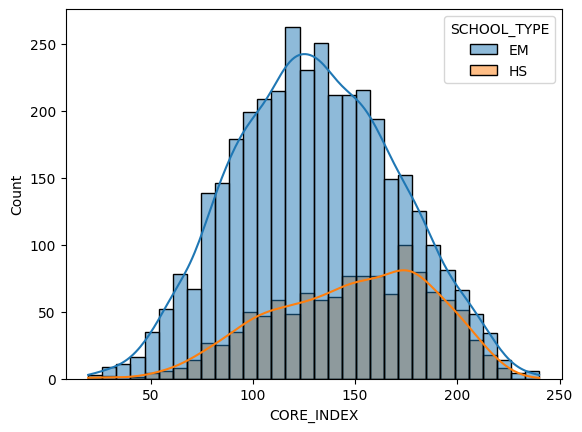

In [12]:
# Getting rid of the "s" entries and forcing the CORE_INDEX column to be numeric
dfCSPR_comb["CORE_INDEX"] = pd.to_numeric(dfCSPR_comb["CORE_INDEX"], errors = "coerce")
dfCSPR_comb = dfCSPR_comb.dropna()

dfab_comb["ABSENT_RATE"] = pd.to_numeric(dfab_comb["ABSENT_RATE"], errors = "coerce")
dfab_comb = dfab_comb.dropna()



# dfcomb.info()
sns.histplot(data=dfCSPR_comb, x="CORE_INDEX", hue = "SCHOOL_TYPE", kde = True)



In [13]:
dfab_comb = dfab_comb.drop(columns=['INSTITUTION_ID', 'DATA_REP_FLAG'], axis=1)

In [14]:
dfab_comb.head()

,ENTITY_CD,ABSENT_RATE
41007,10100010014,12.4
41008,10100010018,34.1
41018,10100010019,17.1
41029,10100010028,24.7
41039,10100010029,46.3


In [15]:
#merging

from functools import reduce

# Data Frames List
data_frames_to_merge = [df_epp_t, df_nxp_t, df_ocert_t, dfab_comb, dfCSPR_comb]

# Merging Function
def merge_function(left_df, right_df):
    return pd.merge(left_df, right_df, on='ENTITY_CD',
                                            how='inner'
                                            )

# Merge 'em! 
df = reduce(merge_function, data_frames_to_merge)


In [16]:
df.sample(5)

,ENTITY_NAME,ENTITY_CD,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,ABSENT_RATE,INSTITUTION_ID,CORE_INDEX,SUBJECT,SCHOOL_TYPE
3369,ARGYLE JUNIOR/SENIOR HS,640101040001,14901.0,10.0,3.0,33.3,800000035971,175.1,Combined,HS
225,GOWANDA MIDDLE SCHOOL,42801060005,20185.0,16.0,5.0,44.5,800000054682,107.1,Combined,EM
2352,WILLSBORO CENTRAL SCHOOL,151701040001,17842.0,17.0,17.0,15.3,800000051800,122.2,Combined,EM
2119,DALTON-NUNDA SECONDARY SCHOOL,241101040003,15409.0,3.0,13.0,30.2,800000033950,147.8,Combined,HS
858,CENTENNIAL AVENUE ELEMENTARY,280208030002,24664.0,14.0,0.0,32.0,800000049670,108.6,Combined,EM


In [20]:
#df.sample(50)
#df.shape
df.to_csv("../Data/Expendatures Teacher Inexperience Out of Cert Core Index and Absent Rate")

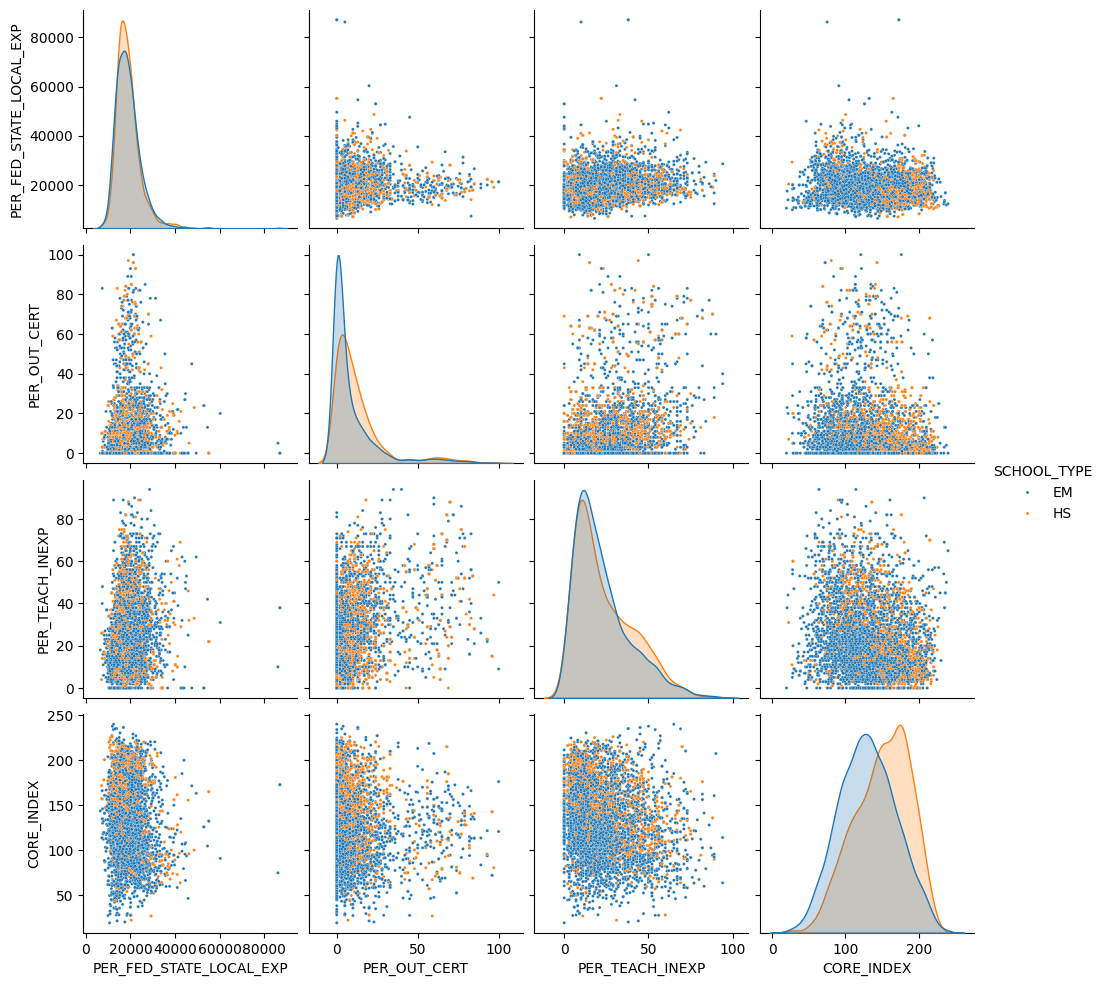

In [18]:
#pairplot

col_palette = {
    "EM": ("blue", .5), 
    "HS": ("orange", 1)
}
sns.pairplot(df, 
             x_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP", "CORE_INDEX"], 
             y_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP", "CORE_INDEX"], 
             hue="SCHOOL_TYPE", 
             # palette=col_palette, 
             plot_kws={"s": 5}, 
             diag_kws={"common_norm": False}
            #  kind="hex", 
             )

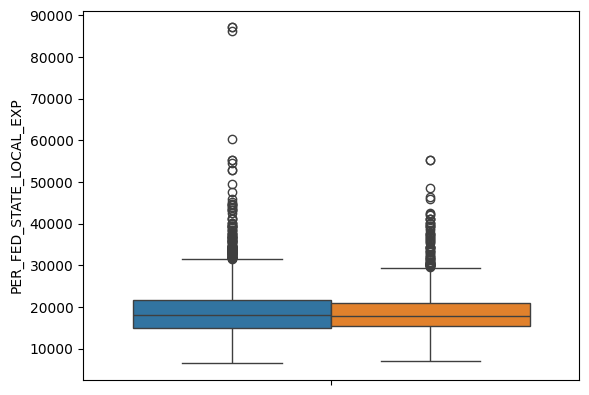

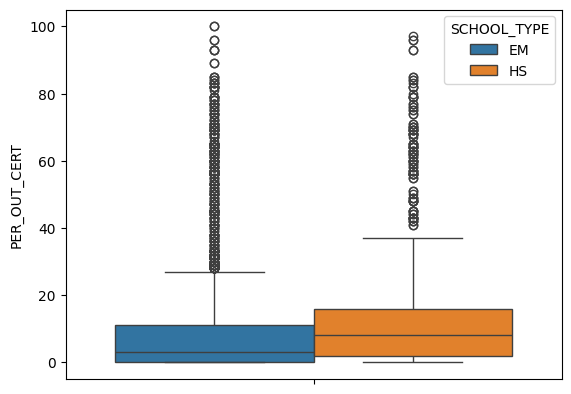

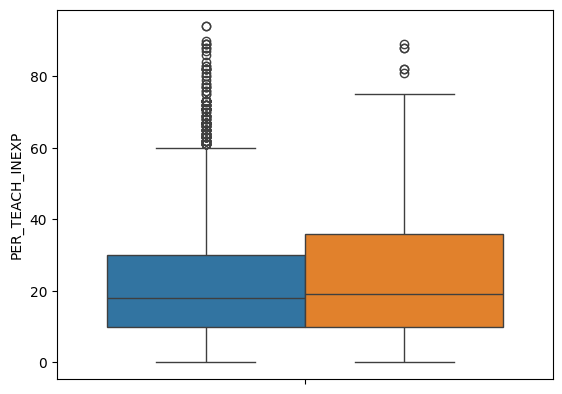

In [19]:
for index, parameter in enumerate(("PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP")):
    sns.boxplot(data=df, y=parameter, hue="SCHOOL_TYPE", legend=(index == 1))
    plt.show()